In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def process_image(img):
    dim = (224,224)
    img = plt.imread(img)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
    return img

In [4]:
images_dir = 'images/'

In [5]:
from os import listdir

test_images = []

for file in listdir(images_dir):
    test_images.append(process_image(images_dir+file))

IndexError: index 9 is out of bounds for axis 0 with size 9

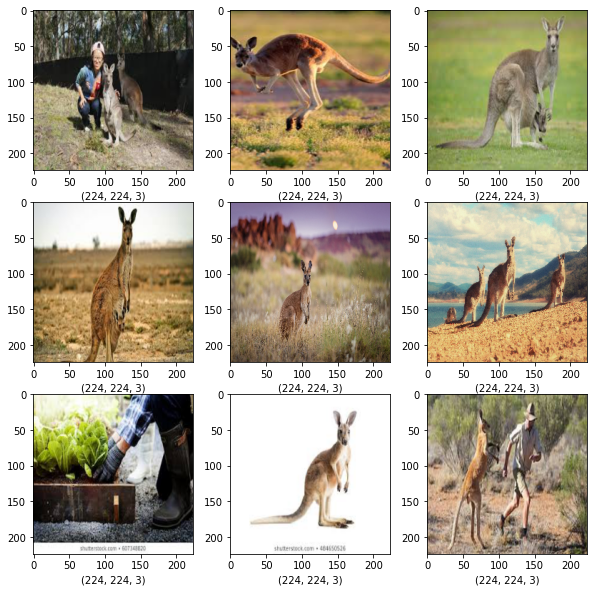

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(10,10))
ax = axes.flatten()
for i in range(len(test_images)):
    ax[i].imshow(test_images[i])
    ax[i].set_xlabel(test_images[i].shape)

In [26]:
import keras
# from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
from keras.models import model_from_json

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
    json_file = open('kangaroo3.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)

    # load weights into new model
    loaded_model.load_weights("kangaroo3.h5")

In [8]:
def draw_mask(box):
    masks = np.zeros([224, 224], dtype='uint8')
    row_s, row_e = box[1], box[3]
    col_s, col_e = box[0], box[2]
    masks[row_s:row_e, col_s:col_e] = 1
    plt.imshow(masks[:, :], cmap='gray', alpha=0.4)

array([ 65,  45, 174, 180])

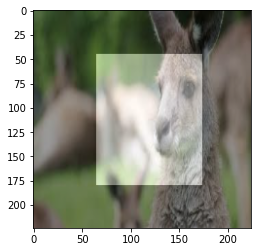

In [37]:
i=9
pred = np.round(loaded_model.predict(np.array([test_images[i]]))[0]).astype(int)
plt.imshow(test_images[i])
draw_mask(pred)
pred